正在下载/加载 MNIST 训练数据集...
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.78MB/s]


Extracting /home/zhy/Zhou/mixture_of_experts/_image_run/MINST/MNIST/raw/train-images-idx3-ubyte.gz to /home/zhy/Zhou/mixture_of_experts/_image_run/MINST/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 28.9k/28.9k [00:00<00:00, 36.4kB/s]


Extracting /home/zhy/Zhou/mixture_of_experts/_image_run/MINST/MNIST/raw/train-labels-idx1-ubyte.gz to /home/zhy/Zhou/mixture_of_experts/_image_run/MINST/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.18MB/s]


Extracting /home/zhy/Zhou/mixture_of_experts/_image_run/MINST/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/zhy/Zhou/mixture_of_experts/_image_run/MINST/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.61MB/s]


Extracting /home/zhy/Zhou/mixture_of_experts/_image_run/MINST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/zhy/Zhou/mixture_of_experts/_image_run/MINST/MNIST/raw

数据集加载完成。

--- 第一批数据结果 ---
图片张量形状 (Batch, C, H, W): torch.Size([4, 1, 28, 28])
标签张量形状 (Batch): torch.Size([4])

--- 图像 1 ---
  标签: 0
  部分像素值 (前5x5):
tensor([[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242]])
--------------------
--- 图像 2 ---
  标签: 1
  部分像素值 (前5x5):
tensor([[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242]])
--------------------
--- 图像 3 ---
  标签: 0
  部分像素值 (前5x5):
tensor([[-0.4242, -0.

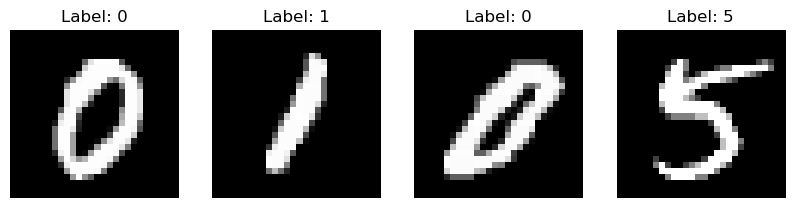

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt # 用于可视化，可选

# 1. 定义数据预处理步骤
# 转换为 Tensor，并进行标准化（这是深度学习的标准步骤）
transform = transforms.Compose([
    transforms.ToTensor(),
    # MNIST的均值和标准差，用于将像素值归一化到 [-1, 1] 左右
    transforms.Normalize((0.1307,), (0.3081,))
])

# 2. 下载并加载数据集
# root='.' 表示下载到当前文件夹
# train=True 表示下载训练集 (共60000张)
# download=True 表示如果本地没有，则下载
print("正在下载/加载 MNIST 训练数据集...")
train_dataset = torchvision.datasets.MNIST(root='/home/zhy/Zhou/mixture_of_experts/_image_run/MINST/', 
                                           train=True, 
                                           transform=transform, 
                                           download=True)
print("数据集加载完成。")

# 3. 使用 DataLoader 载入数据
# 设置一个较小的 batch_size 方便查看结果
batch_size = 4
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

# 4. 取出并打印第一批数据
# 迭代器next()方法取出第一批数据
data_iter = iter(train_loader)
images, labels = next(data_iter)

print("\n--- 第一批数据结果 ---")
print(f"图片张量形状 (Batch, C, H, W): {images.shape}")
print(f"标签张量形状 (Batch): {labels.shape}\n")

# 5. 打印前4张图片的信息
for i in range(batch_size):
    print(f"--- 图像 {i+1} ---")
    
    # 打印标签
    print(f"  标签: {labels[i].item()}")
    
    # 打印部分像素值 (张量切片)
    # 形状是 (1, 28, 28)，这里打印第0通道的前5行5列的像素值
    print("  部分像素值 (前5x5):")
    print(images[i, 0, :5, :5])
    print("-" * 20)
# （接上面的代码，在第5步之后运行）
fig, axes = plt.subplots(1, batch_size, figsize=(10, 3))
for i in range(batch_size):
    # 移除标准化并转为Numpy数组
    img = images[i].numpy().transpose((1, 2, 0)) # 将(C, H, W)转为(H, W, C)
    
    # 因为图像是归一化过的，这里需要简单的反归一化来正确显示
    # 仅为了显示效果，我们直接裁剪到有效范围
    axes[i].imshow(img.squeeze(), cmap='gray') 
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis('off')

plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    """
    经典的 LeNet-5 架构，针对 28x28 灰度图 (MNIST) 进行了调整。
    
    原始 LeNet-5 的输入是 32x32，这里使用 28x28，
    但整体的 Conv -> Pool -> Conv -> Pool -> FC 结构保持不变。
    """
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        
        # 1. 卷积层 C1
        # 输入: (1, 28, 28)
        # 输出: (6, 28, 28)  (6个 5x5 卷积核, padding=2 保持尺寸)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        # 激活函数: 使用 ReLU 取代 sigmoid/tanh，以加速训练
        
        # 2. 池化层 S2 (平均池化)
        # 输入: (6, 28, 28)
        # 输出: (6, 14, 14)  (2x2 池化，步长为 2)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        # 3. 卷积层 C3
        # 输入: (6, 14, 14)
        # 输出: (16, 10, 10) (16个 5x5 卷积核, 无 padding)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        
        # 4. 池化层 S4 (平均池化)
        # 输入: (16, 10, 10)
        # 输出: (16, 5, 5)   (2x2 池化，步长为 2)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        # 计算进入全连接层时的展平尺寸: 16 * 5 * 5 = 400
        
        # 5. 全连接层 F5
        # 输入: 16 * 5 * 5 = 400
        # 输出: 120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        
        # 6. 全连接层 F6
        # 输入: 120
        # 输出: 84
        self.fc2 = nn.Linear(120, 84)
        
        # 7. 输出层 Output
        # 输入: 84
        # 输出: num_classes (10)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        # C1: Conv -> ReLU -> Pool
        x = self.pool1(F.relu(self.conv1(x)))
        
        # C3: Conv -> ReLU -> Pool
        x = self.pool2(F.relu(self.conv2(x)))
        
        # 展平操作 (Flatten): (Batch, 16, 5, 5) -> (Batch, 400)
        x = x.view(-1, 16 * 5 * 5)
        
        # F5: FC -> ReLU
        x = F.relu(self.fc1(x))
        
        # F6: FC -> ReLU
        x = F.relu(self.fc2(x))
        
        # Output: FC
        x = self.fc3(x)
        
        # 注意: 训练时通常直接输出 logits，不在这里加 softmax
        return x

# 实例化 LeNet-5 模型
net = Net(num_classes=10)

# 打印模型结构
print("--- LeNet-5 模型结构 ---")
print(net)

# 检查输入/输出尺寸
# 假设批量大小为 64，输入是 (64, 1, 28, 28)
input_tensor = torch.randn(64, 1, 28, 28) 
output = net(input_tensor)
print(f"\n输入尺寸: {input_tensor.shape}")
print(f"输出尺寸: {output.shape}") 
# 预期输出: torch.Size([64, 10])

--- LeNet-5 模型结构 ---
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

输入尺寸: torch.Size([64, 1, 28, 28])
输出尺寸: torch.Size([64, 10])


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
# 假设 LeNet5 类已定义 (使用上一个回答中的代码)

# --- 0. 环境准备：设备、数据加载 ---

# 检查是否有GPU可用
device = torch.device("cuda:7" if torch.cuda.is_available() else "cpu")
print(f"使用的设备: {device}")

# 数据预处理（与之前相同）
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 重新加载训练集和测试集 (下载/加载)
train_dataset = torchvision.datasets.MNIST(root='/home/zhy/Zhou/mixture_of_experts/_image_run/MINST/', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='/home/zhy/Zhou/mixture_of_experts/_image_run/MINST/', train=False, transform=transform, download=True)

# 定义超参数
BATCH_SIZE = 64 # LeNet通常可以使用较大的Batch Size
epochs = 60 # 沿用您最初设定的epochs

# 数据加载器
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


# --- 1. 模型、优化器和损失函数设置 ---

# 实例化模型并移动到指定设备
net = Net(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30, 45], gamma=0.1)


# --- 2. 训练主循环 ---
print("\n--- 开始训练 ---")

for epoch in range(epochs):  # 循环训练 epochs 次
    net.train() # 设置模型为训练模式
    running_loss = 0.0
    
    # 遍历训练数据加载器中的所有批次
    for i, data in enumerate(train_loader, 0):
        # 获取输入数据和标签，并移动到设备上
        inputs, labels = data[0].to(device), data[1].to(device)


        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # 每隔 190 个 mini-batches 打印一次 Loss
        # 您的数据集总共 60000/64 = 937.5 个 batch，所以 190 是一个很好的间隔
        if i % 190 == 189: # 这里的 189 确保是第 190, 380, ... 个 batch 结束时打印
            print(f'[{epoch + 1:2d}, {i + 1:5d}] loss: {running_loss / 190:.3f}')
            running_loss = 0.0 # 清零累加器，开始统计下一个 190 batch 的平均 Loss

    scheduler.step()
    current_lr = scheduler.get_last_lr()[0]
    print(f"Epoch {epoch + 1} 结束, 当前学习率 (LR): {current_lr:.6f}")

print('训练结束!')



# 保存训练好的模型（可选）
PATH = '/home/zhy/Zhou/mixture_of_experts/_image_run/saved_cnn/mnist_lenet5.pth'
torch.save(net.state_dict(), PATH)

使用的设备: cuda:7

--- 开始训练 ---
[ 1,   190] loss: 1.195
[ 1,   380] loss: 0.253
[ 1,   570] loss: 0.185
[ 1,   760] loss: 0.173
Epoch 1 结束, 当前学习率 (LR): 0.100000
[ 2,   190] loss: 0.134
[ 2,   380] loss: 0.122
[ 2,   570] loss: 0.112
[ 2,   760] loss: 0.107
Epoch 2 结束, 当前学习率 (LR): 0.100000
[ 3,   190] loss: 0.097
[ 3,   380] loss: 0.102
[ 3,   570] loss: 0.102
[ 3,   760] loss: 0.091
Epoch 3 结束, 当前学习率 (LR): 0.100000
[ 4,   190] loss: 0.086
[ 4,   380] loss: 0.096
[ 4,   570] loss: 0.100
[ 4,   760] loss: 0.094
Epoch 4 结束, 当前学习率 (LR): 0.100000
[ 5,   190] loss: 0.082
[ 5,   380] loss: 0.077
[ 5,   570] loss: 0.084
[ 5,   760] loss: 0.090
Epoch 5 结束, 当前学习率 (LR): 0.100000
[ 6,   190] loss: 0.081
[ 6,   380] loss: 0.095
[ 6,   570] loss: 0.081
[ 6,   760] loss: 0.079
Epoch 6 结束, 当前学习率 (LR): 0.100000
[ 7,   190] loss: 0.079
[ 7,   380] loss: 0.084
[ 7,   570] loss: 0.091
[ 7,   760] loss: 0.074
Epoch 7 结束, 当前学习率 (LR): 0.100000
[ 8,   190] loss: 0.076
[ 8,   380] loss: 0.073
[ 8,   570] loss: 0.0

In [4]:
net = Net(num_classes=10).to(device)
net.load_state_dict(torch.load(PATH, weights_only=True))
# 运行评估函数（可选，但推荐）
def evaluate_model():
    net.eval() # 设置模型为评估模式
    correct = 0
    total = 0
    with torch.no_grad(): # 评估时不需要计算梯度
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1) # 获取预测结果
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'\n在 10000 张测试图片上的准确率: {100 * correct / total:.2f} %')

evaluate_model()



在 10000 张测试图片上的准确率: 99.30 %
